<a href="https://colab.research.google.com/github/Elakkiya1802/ML-tasks/blob/main/task3(Bernouille_%26_Multinomial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BernoulliNB**

Confusion Matrix:
 [[62 13]
 [ 5 70]]
Accuracy: 0.88


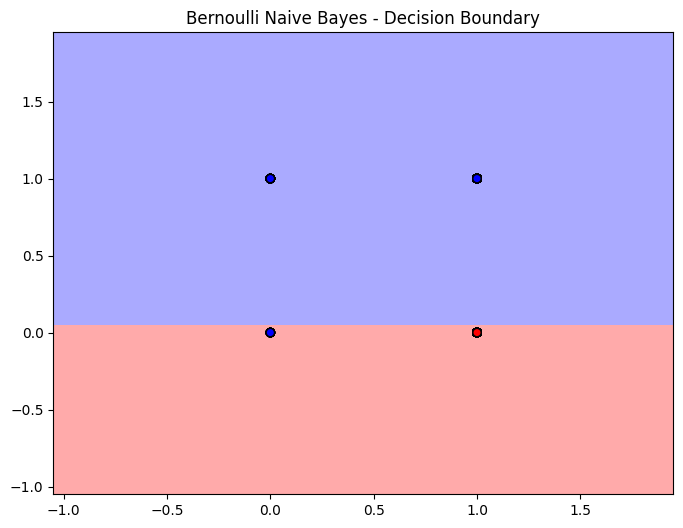

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 1. Generate synthetic binary data
X, y = make_classification(n_samples=500, n_features=2,n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# 2. Convert features to binary (0/1) because BernoulliNB needs binary input
binarizer = Binarizer(threshold=0.0)
X_bin = binarizer.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.3, random_state=42)

# 4. Train Bernoulli Naive Bayes model
model = BernoulliNB()
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluation
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)

# 7. Visualization of decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

x_min, x_max = X_bin[:, 0].min() - 1, X_bin[:, 0].max() + 1
y_min, y_max = X_bin[:, 1].min() - 1, X_bin[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X_bin[:, 0], X_bin[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
plt.title("Bernoulli Naive Bayes - Decision Boundary")
plt.show()


Multinomial naive bayes(Sentiment analysis)

                   review  sentiment
0     I love this product          1
1      Amazing experience          1
2          Very satisfied          1
3  Happy with the service          1
4       This is fantastic          1
5     I hate this product          0
6        Very bad quality          0
7     Terrible experience          0
8           Not satisfied          0
9      Worst service ever          0

Confusion Matrix:
 [[0 2]
 [1 0]]
Accuracy: 0.0


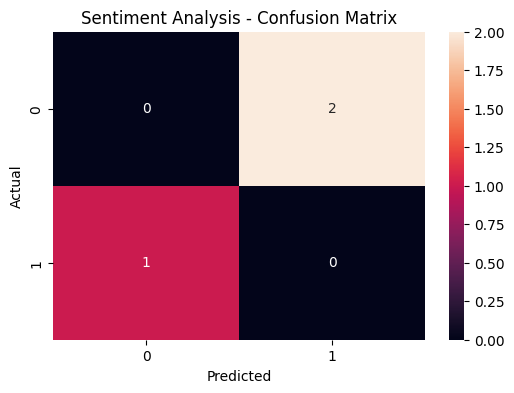


Test Sentence: I really love this amazing service
Predicted Sentiment: Positive


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

#1. Create a small sentiment dataset
data = {
    "review": [
        "I love this product",
        "Amazing experience",
        "Very satisfied",
        "Happy with the service",
        "This is fantastic",

        "I hate this product",
        "Very bad quality",
        "Terrible experience",
        "Not satisfied",
        "Worst service ever"
    ],
    # 1 = Positive, 0 = Negative
    "sentiment": [1,1,1,1,1, 0,0,0,0,0]
}

df = pd.DataFrame(data)
print(df)

# 2. Convert text into numeric features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["review"])
y = df["sentiment"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

#5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluation
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)
print("Accuracy:", acc)

# 7. Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Sentiment Analysis - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test with new sentence
test_sentence = ["I really love this amazing service"]
test_vector = vectorizer.transform(test_sentence)
prediction = model.predict(test_vector)

print("\nTest Sentence:", test_sentence[0])
print("Predicted Sentiment:", "Positive" if prediction[0]==1 else "Negative")
